# Teletrasporto Quantistico - *Quantum Teleportation*

Permette di trasferire distruggere e ricostruire uno stato quantistico in un altro qubit. Non esiste un teletrasporto vero e proprio del qubit, tanto più dello stato del qubit di Alice nel qubit di Bob.

Nel circuito qui disegnato, lo stato di $q_0$ viene ricostruito all'interno di $q_2$.

- $q_0$ viene assegnato ad uno stato quantistico arbitrario, ed è il qubit da teletrasportare.
- $q_1,q_2$ è una coppia entangled $|\Phi^+\rangle$, $q_2$ è il qubit in cui andremo a teletrasportare lo stato di $q_0$.
- Effettuiamo una misura di Hadamard sulla coppia $q_0,q_1$.
- Tramite i risultati delle misurazioni di $q_0,q_1$ , è possibile applicare delle correzioni sul qubit $q_2$ per ricostruire correttamente lo stato. 

### Circuito in Qiskit - Quantum Teleportation

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_counts

import numpy as np
from BoredQiskit import FastQiskit as fq

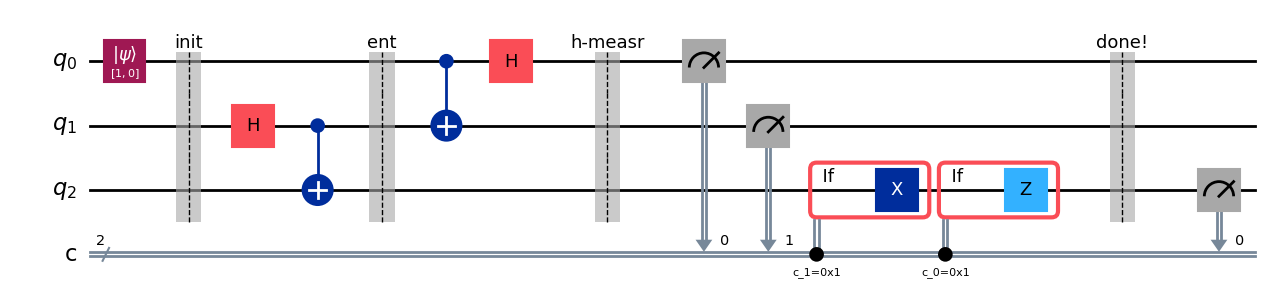

In [7]:
qc = QuantumCircuit(3,2)
qc.initialize([1,0], 0) # inizializzazione
qc.barrier(label="init")

qc.h(1)
qc.cx(1,2) # entanglement
qc.barrier(label="ent")

qc.cx(0,1)
qc.h(0) # misurazione di Hadamard
qc.barrier(label="h-measr")

qc.measure(range(0,2), range(0,2))
with qc.if_test((1,1)):
    qc.x(2)
with qc.if_test((0,1)): # correzioni
    qc.z(2)
qc.barrier(label="done!")

qc.measure(2,0) # teletrasporto concluso!
qc.draw('mpl')


### Test su simulatore ideale e stato $|0\rangle$

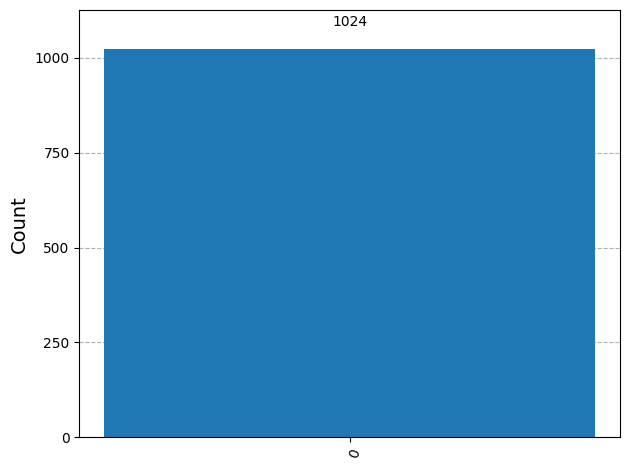

In [5]:
counts = fq.run(qc, 1024)
counts = marginal_counts(counts, [0])
plot_histogram(counts)

### Test su hardware reale simulato su stato $|0\rangle$

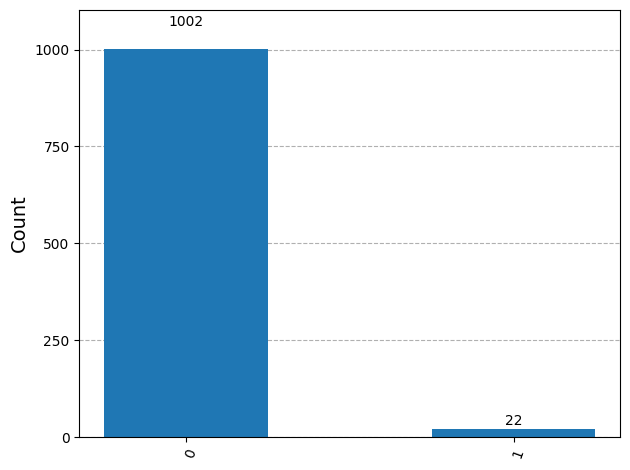

In [6]:
counts = fq.torino_run(qc, 1024)
counts = marginal_counts(counts, [0])
plot_histogram(counts)

### Test su stato $|+\rangle$

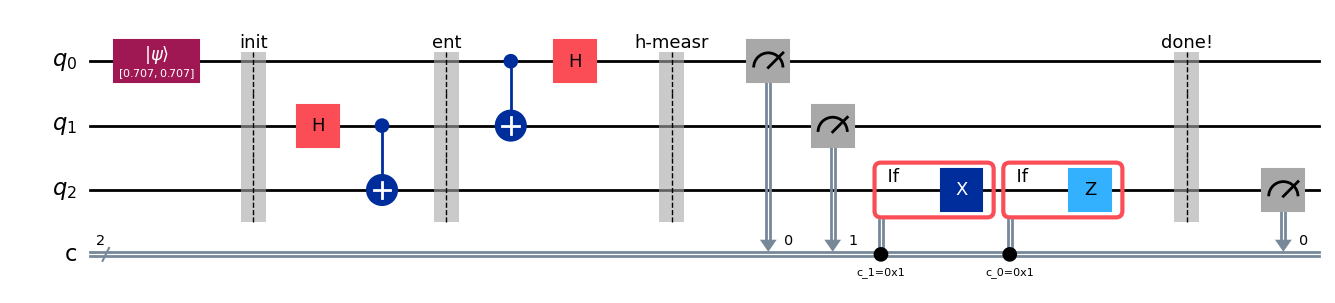

In [8]:
qc = QuantumCircuit(3,2)
qc.initialize([1/np.sqrt(2),1/np.sqrt(2)], 0) # inizializzazione
qc.barrier(label="init")

qc.h(1)
qc.cx(1,2) # entanglement
qc.barrier(label="ent")

qc.cx(0,1)
qc.h(0) # misurazione di Hadamard
qc.barrier(label="h-measr")

qc.measure(range(0,2), range(0,2))
with qc.if_test((1,1)):
    qc.x(2)
with qc.if_test((0,1)): # correzioni
    qc.z(2)
qc.barrier(label="done!")

qc.measure(2,0) # teletrasporto concluso!
qc.draw('mpl')


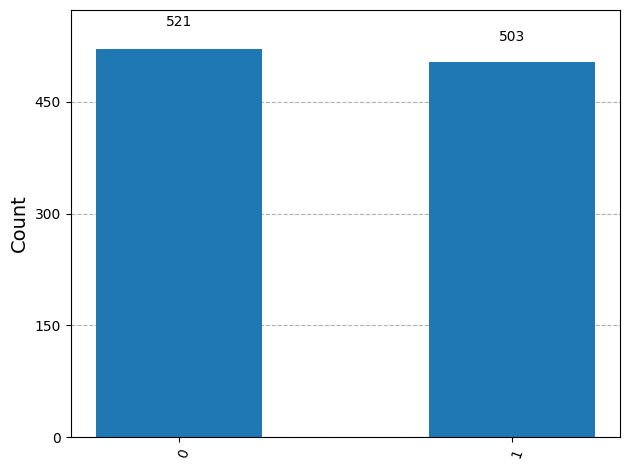

In [9]:
counts = fq.run(qc, 1024)
counts = marginal_counts(counts, [0])
plot_histogram(counts)

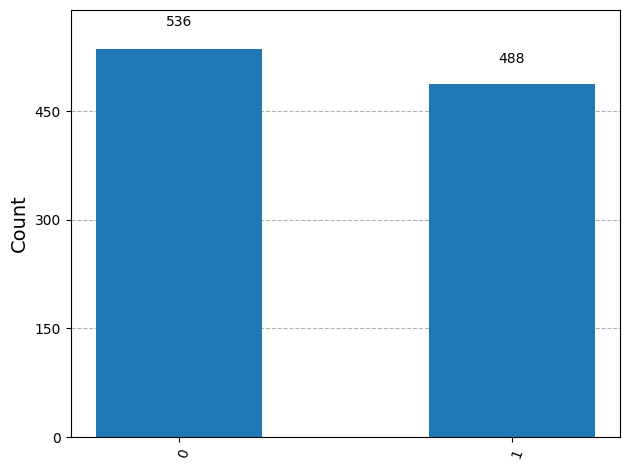

In [10]:
counts = fq.torino_run(qc, 1024)
counts = marginal_counts(counts, [0])
plot_histogram(counts)